# Merge and clean CSV files

In [112]:
#module imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob

os.getcwd()

'/nas/cee-water/cjgleason/ellie/SNiP/RFmodel'

In [113]:
file_list = glob.glob(os.path.join('huc5_4sites', '*.csv'))
dataframe = pd.concat(map(pd.read_csv, file_list), ignore_index=True)
#Drop na, synch column names if needed, and remove negative band values
df=dataframe.dropna(subset='blue').drop_duplicates()
df = df[(df.red > 0) & (df.nir > 0) & (df.blue > 0) & (df.green > 0) & (df.swir1 > 0) & (df.swir2 > 0) & (df.nir > 0)]

df
print(df.columns.values.tolist())

['SiteID', 'system:index', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'elevation']


In [114]:
df.describe()

,blue_sd,green_sd,red_sd,nir_sd,swir1_sd,swir2_sd,dswe_sd,blue,green,red,nir,swir1,swir2,dswe,pixelCount,elevation
count,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000
mean,606.333335,544.258127,608.553810,734.239940,543.145180,749.539050,0.157112,4374.113563,5965.961165,6224.994999,4492.194028,3217.776699,3165.190203,1.472051,71.605472,175.197705
std,1763.521345,1467.165655,1553.975659,1936.042005,1597.502288,2417.473191,0.206533,8411.629384,9669.664828,10029.062251,8428.240758,6721.883391,6846.016887,0.491045,26.462451,26.033647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,68.000000,14.000000,1.000000,1.000000,0.500000,1.000000,1.000000,154.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,386.000000,718.000000,684.000000,476.000000,253.000000,187.000000,1.000000,57.000000,154.000000
50%,106.093741,120.610183,139.550142,197.564687,128.318804,133.909820,0.000000,743.000000,1246.000000,1368.000000,907.000000,520.000000,491.000000,1.000000,76.000000,172.000000
75%,287.088785,324.943956,410.547815,416.819905,273.307094,352.256225,0.390312,2732.000000,5122.000000,5620.750000,3029.500000,1904.500000,2016.500000,2.000000,89.000000,172.000000
max,24136.500000,15659.000000,15816.000000,16122.000000,16056.500000,26769.302279,0.500000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,2.000000,126.000000,240.000000


In [115]:
#Add band ratios

df = df.assign(NR = df['nir']/df['red'],
                BR = df['blue']/df['red'],
                GR = df['green']/df['red'],
                SR = df['swir1']/df['red'],
                BG = df['blue']/df['green'],
                RG = df['red']/df['green'],
                NG = df['nir']/df['green'],
                SG = df['swir1']/df['green'],
                BN = df['blue']/df['nir'],
                GN = df['green']/df['nir'],
                RN = df['red']/df['nir'],
                SN = df['swir1']/df['nir'],
                BS = df['blue']/df['swir1'],
                GS = df['green']/df['swir1'],
                RS = df['red']/df['swir1'],
                NS = df['nir']/df['swir1'],
                R_GN = df['red']/ (df['green'] + df['nir']),
                R_GB = df['red']/ (df['green'] + df['blue']),
                R_GS = df['red']/ (df['green'] + df['swir1']),
                R_BN = df['red']/ (df['blue'] + df['nir']),
                R_BS = df['red']/ (df['blue'] + df['swir1']),
                R_NS = df['red']/ (df['nir'] + df['swir1']),
                G_BR = df['green']/ (df['blue'] + df['red']),
                G_BN = df['green'] / (df['blue'] + df['nir']),
                G_BS = df['green'] / (df['blue'] + df['swir1']),
                G_RN = df['green'] / (df['red'] + df['nir']),
                G_RB = df['green'] / (df['red'] + df['blue']),
                G_NS = df['green'] / (df['nir'] + df['swir1']),
                B_RG = df['blue'] / (df['red'] + df['green']),
                B_RN = df['blue'] / (df['red'] + df['nir']),
                B_RS = df['blue'] / (df['red'] + df['swir1']),
                B_GN = df['blue'] / (df['green'] + df['nir']),
                B_GS = df['blue'] / (df['green'] + df['swir1']),
                B_NS = df['blue'] / (df['nir'] + df['swir1']),
                N_RG = df['nir'] / (df['red'] + df['green']),
                N_RB = df['nir'] / (df['red'] + df['blue']),
                N_RS = df['nir'] / (df['red'] + df['swir1']),
                N_GB = df['nir'] / (df['green'] + df['blue']),
                N_GS = df['nir'] / (df['green'] + df['swir1']),
                N_BS = df['nir'] / (df['blue']  + df['swir1']),
                
                GR2 = (df['green'] + df['red']) / 2,
                GN2 = (df['green'] + df['nir']) / 2,
                #blooms
                BR_G = (df['blue'] - df['red']) / df['green'],
                NS_NR = (df['nir'] - df['swir1']) / (df['red'] - df['swir1']),
                fai = df['nir'] - (df['red'] + (df['swir1']-df['red'])*((830-660)/(1650-660))),
                # fai = (nir - red) + (red -swir) * (830-660)/(1648-660)
                N_S= df['nir'] - df['swir1'],
                N_R = df['nir']- df['red'],
                #
                ndvi = ((df['nir']-df['red'])/(df['nir']+df['red'])),
                ndwi = ((df['green']- df['swir1'])/(df['green'] + df['swir1'])),
                ndssi = ((df['blue'] - df['nir'])/ (df['blue'] + df['nir'])),
                gn_gn= ((df['green']- df['nir'])/ (df['green'] + df['nir'])),
                Matchup = 'Fusion',
                date = df['system:index'])
df = df.drop(['system:index'], axis=1)

In [116]:
# Column formatting
df['date'] = df['date'].str.slice(0, 10)
df['date'] = df['date'].str.replace('_','-')
df.date

0        2016-06-11
1        2016-06-12
2        2016-06-13
3        2016-06-14
4        2016-06-15
            ...    
13746    2021-03-07
13751    2021-03-17
13768    2021-09-27
13819    2020-03-25
13824    2022-11-01
Name: date, Length: 3399, dtype: object

In [117]:
#Rename to fusion and add some new colunms for plotting/sorting/exploring data
fusion = df.sort_values(by = 'date')
fusion['date'] = pd.to_datetime(fusion.date)
fusion['year'] = pd.to_datetime(fusion['date']).dt.year
fusion['month'] = pd.to_datetime(fusion['date']).dt.month
fusion['R_GB_log'] = np.log(fusion['R_GB'])
print(fusion.columns.values.tolist())
print(fusion.shape[0])

['SiteID', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'elevation', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'date', 'year', 'month', 'R_GB_log']
3399


<AxesSubplot:xlabel='date', ylabel='R_GB'>

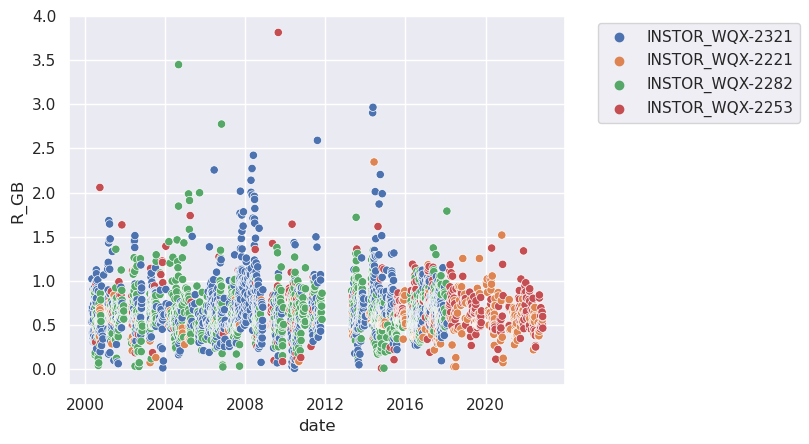

In [118]:
#Generate a first look Plot
plot = sns.scatterplot(data=fusion, x="date", y="R_GB", hue="SiteID")
plt.legend(fontsize='6')

sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
plot

<AxesSubplot:xlabel='date', ylabel='R_GB'>

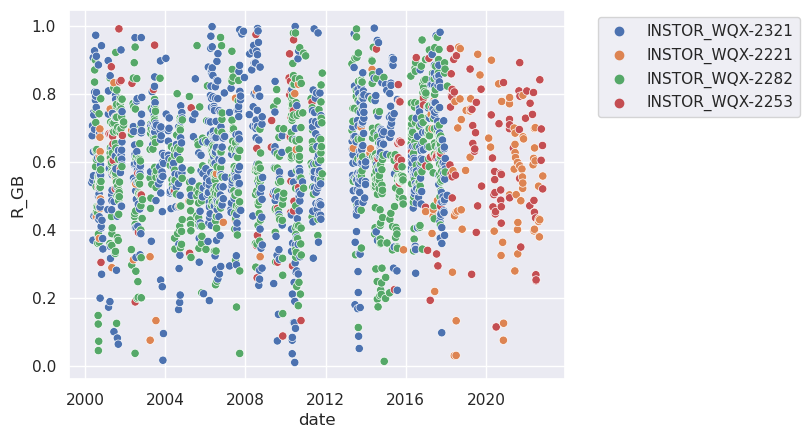

In [119]:
#Potential Clean
fusionFilter = fusion
fusionFilter = fusionFilter[(fusionFilter.red < 2500) & (fusionFilter.red_sd < 1000) & (fusionFilter.green < 2500) & (fusionFilter.swir2 < 2500) & (fusionFilter.blue < 2500) & (fusionFilter.blue_sd < 1000) & (fusionFilter.R_GB < 1.0)]

#Generate a first look Plot
plot = sns.scatterplot(data=fusionFilter, x="date", y="R_GB", hue="SiteID")
plt.legend(fontsize='6')

sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
plot

In [120]:
#Matchups
#bring in WQP cleaned data
huc5 = pd.read_csv(r'notAquasat_huc5_5.csv')
huc5['tss'] = huc5['value']
print(huc5.columns.values.tolist())
print(len(huc5.index))
print(huc5['units'].unique())

site = huc5[huc5['SiteID'] == 'INSTOR_WQX-2221'] #'USGS-03049625']
site = site[site['date'] > '2000-01-01']
#print(site)
print(huc5.sort_values(by = 'date'))

['Unnamed: 0', 'parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'value', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'year', 'tss']
132346
['%' 'mg/l']
        Unnamed: 0                               parameter units  \
17901        17902  Suspended Sediment Concentration (SSC)  mg/l   
18588        18589  Suspended Sediment Concentration (SSC)  mg/l   
71551        71552                  Total suspended solids  mg/l   
71208        71209                  Total suspended solids  mg/l   
17911        17912  Suspended Sediment Concentration (SSC)  mg/l   
...            ...                                     ...   ...   
35180        35181                  Total suspended solids  mg/l   
120981      120982                  Total suspended solids  mg/l   
34156        34157                  Total suspended solids  mg/l   
34741        34742                  Total suspended solids  mg/l   
35175        35176                  Total suspended solids 

/scratch/ceewater-cpu001/4313119/ipykernel_1783248/3025177933.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  huc5 = pd.read_csv(r'notAquasat_huc5_5.csv')


In [121]:
#Rename columns and merge huc5 and fusion
# huc5['tss'] = huc5['value']

# huc5 = huc5[['SiteID', 'tss', 'date', 'year']]

# fusionMerge = pd.merge(df, huc5, on =['SiteID', 'date'], how ="inner")
# fusionMerge['SiteID'].unique()
# fusionMerge.drop_duplicates()

# #Add a transformation

# fusionMerge['R_GB_log'] = np.log(fusionMerge['R_GB'])
# fusionMerge['tss_log'] = np.log(fusionMerge['tss'])


In [122]:
#Merge data +/- 1 day
#sort the dataframes
huc5 = huc5.sort_values(by = 'date')
huc5['date'] = pd.to_datetime(huc5['date'], format = '%Y-%m-%d')
huc5 = huc5[huc5['units'] == 'mg/l']

fusion = fusion.sort_values(by = 'date')
fusion['date'] = pd.to_datetime(fusion['date'], format = '%Y-%m-%d')


fusionMerge_timediff = pd.merge_asof(huc5, fusion, on = 'date', by ='SiteID',
                                 tolerance=pd.Timedelta(1, "d"),
                                 allow_exact_matches=True).dropna(subset = 'blue')

fusionMerge_timediff['R_GB_log'] = np.log(fusionMerge_timediff['R_GB'])
#fusionMerge_timediff['tss'] = np.log(fusionMerge_timediff['tss_x'])

fusionMerge_timediff['tss_log'] = np.log(fusionMerge_timediff['tss'])
# print the variable
print(fusionMerge_timediff.columns.values.tolist())
print(fusionMerge_timediff)

#get siteID's
fusionSites = list(fusionMerge_timediff.SiteID.unique())
print(fusionSites)

['Unnamed: 0', 'parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'value', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'year_x', 'tss', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'elevation', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'year_y', 'month', 'R_GB_log', 'tss_log']
        Unnamed: 0               parameter units           SiteID        lat  \
33717        82055  Total suspended solids  mg/l  INSTOR_WQX-2321  40.411819   
34059        92378  Total suspended solids  mg/l  INSTOR_WQX-2321  40.411819

In [123]:
print(fusionMerge_timediff.tss.describe())

count     87.000000
mean      45.574713
std       57.183636
min        6.000000
25%       22.000000
50%       31.000000
75%       44.500000
max      436.000000
Name: tss, dtype: float64


<AxesSubplot:xlabel='red', ylabel='tss'>

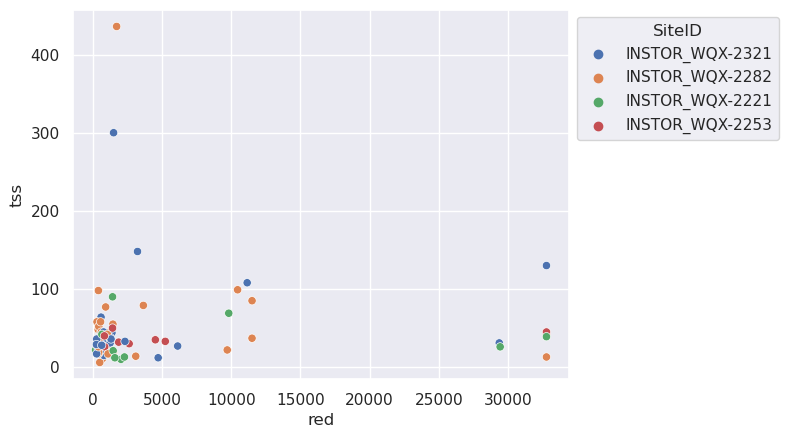

In [124]:
#Generate Plot
#Generate Plot
plot = sns.scatterplot(data=fusionMerge_timediff, x="red", y="tss", hue="SiteID")
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot

['SiteID', 'date', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'elevation', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'year', 'month', 'R_GB_log']


<AxesSubplot:xlabel='date', ylabel='red'>

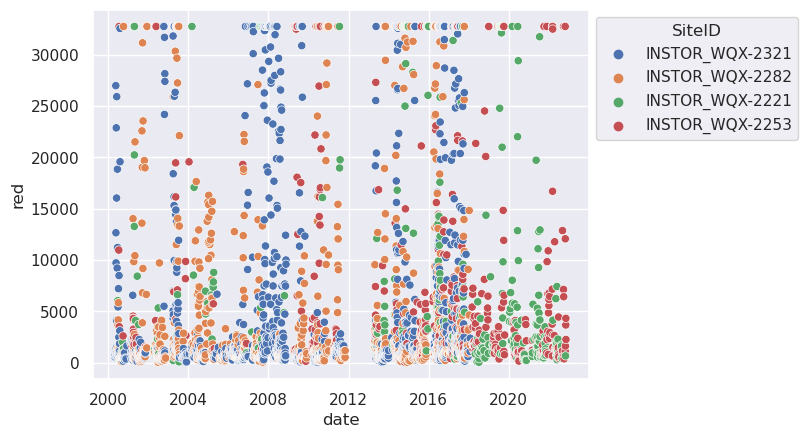

In [125]:
#All unmatched fusion
fusionMerge_timediff_cute = fusionMerge_timediff [['SiteID', 'date']]

fusUnmatched = pd.merge(fusionMerge_timediff_cute, fusion, on =['SiteID', 'date'], how ="outer")
fusUnmatched.drop(['Matchup'], axis=1)
fusUnmatched['Matchup'] = 'Fusion-No Match'
print(fusUnmatched.columns.values.tolist())
#Generate Plot
plot = sns.scatterplot(data=fusUnmatched, x="date", y="red", hue="SiteID")
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot

In [126]:
#Read in aquasat
aquaHuc5 = pd.read_csv(r'aquasatHLS_huc5_ratio.csv')
aquaHuc5.columns = aquaHuc5.columns.str.replace("[.]", "_")
print(aquaHuc5[aquaHuc5['SiteID'] == 'INSTOR_WQX-2221'])

#Add a transformation
aquaHuc5 = aquaHuc5[aquaHuc5['units'] == 'mg/l']
aquaHuc5['R_GB_log'] = np.log(aquaHuc5['R_GB'])
aquaHuc5['tss_log'] = np.log(aquaHuc5['tss'])
#aquaHuc5['Matchup'] = 'Aquasat'
#aquaHuc5['date'] = pd.to_datetime(aquaHuc5['date'], format = "%m/%d/%Y").dt.strftime("%Y-%m-%d")
aquaHuc5['year'] = pd.to_datetime(aquaHuc5['date']).dt.year
print(aquaHuc5.columns.values.tolist())

     Unnamed: 0_2  Unnamed: 0_1  Unnamed: 0    X_1               parameter  \
167           226         226.0       227.0  227.0  Total suspended solids   
242           304         304.0       305.0  305.0  Total suspended solids   
248           311         311.0       312.0  312.0  Total suspended solids   
274           339         339.0       340.0  340.0  Total suspended solids   
276           341         341.0       342.0  342.0  Total suspended solids   
290           357         357.0       358.0  358.0  Total suspended solids   
408         97614           NaN         NaN    NaN  Total suspended solids   

    units           SiteID        lat       long  datum  ...  month      time  \
167  mg/l  INSTOR_WQX-2221  40.576111 -85.659722  UNKWN  ...      4       NaN   
242  mg/l  INSTOR_WQX-2221  40.576111 -85.659722  UNKWN  ...      5       NaN   
248  mg/l  INSTOR_WQX-2221  40.576111 -85.659722  UNKWN  ...      8       NaN   
274  mg/l  INSTOR_WQX-2221  40.576111 -85.659722  U

/scratch/ceewater-cpu001/4313119/ipykernel_1783248/1401218300.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  aquaHuc5.columns = aquaHuc5.columns.str.replace("[.]", "_")


<AxesSubplot:xlabel='year', ylabel='tss'>

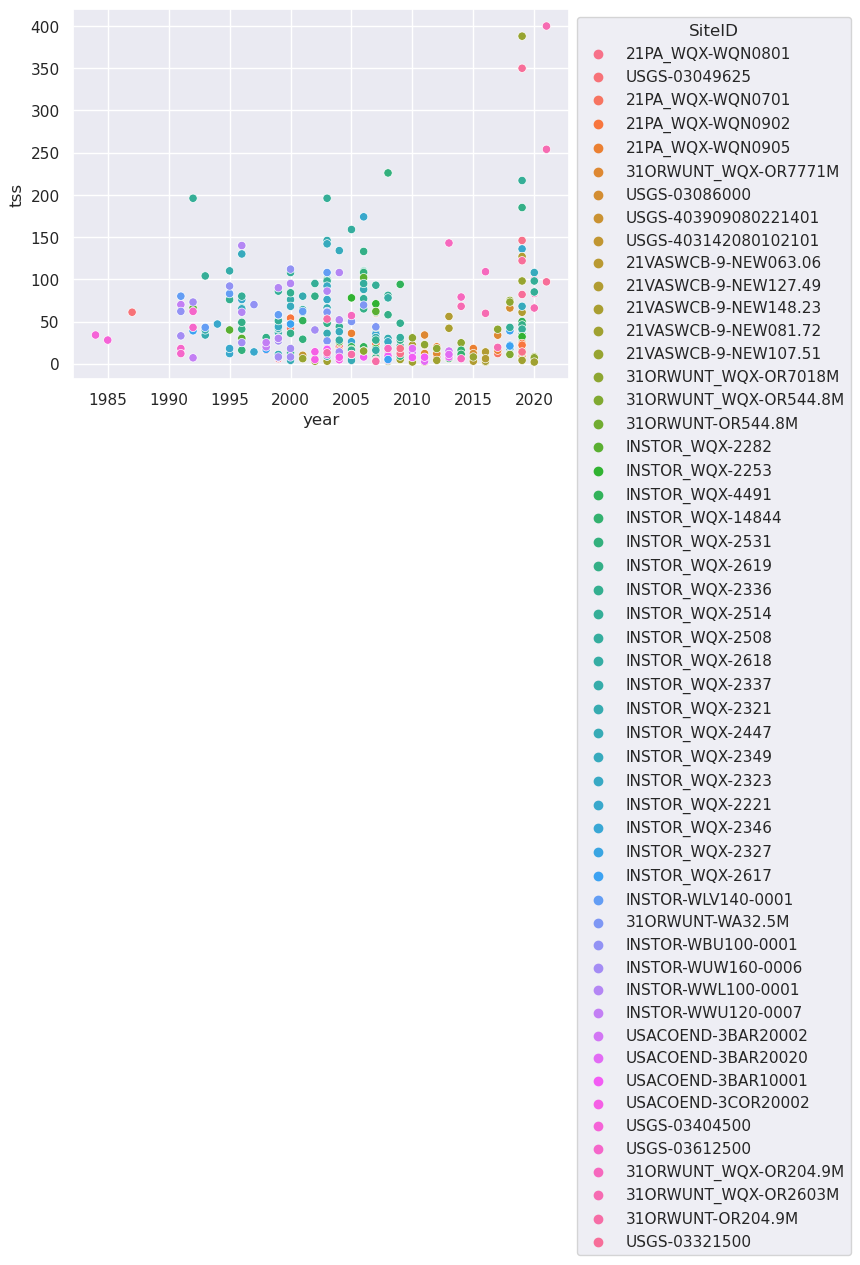

In [127]:
#Generate Plot
#Generate Plot Aquasat
plot = sns.scatterplot(data=aquaHuc5, x="year", y="tss", hue="SiteID")
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot

In [128]:
#AquaFusion data
#aquaHuc5 = aquaHuc5[['SiteID', 'particle_size', 'date', 'blue', 'blue_sd', 'green', 'green_sd', 'nir', 'nir_sd', 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'timediff', 'Matchup', 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn']]


#Fuse data
aquaFusion = pd.concat([fusionMerge_timediff, aquaHuc5]).dropna(subset='blue')
aquaFusion['date'] = pd.to_datetime(aquaFusion['date']).dt.strftime("%Y-%m-%d")
aquaFusion['month'] = pd.to_datetime(aquaFusion['date']).dt.month
aquaFusion['year'] = pd.to_datetime(aquaFusion['date']).dt.year
aquaFusion['day'] = pd.to_datetime(aquaFusion['date']).dt.day
aquaFusion['R_GB_log'] = np.log(aquaFusion['R_GB'])
aquaFusion['tss_log'] = np.log(aquaFusion['tss'])

aquaFusion = aquaFusion[aquaFusion['SiteID'].isin(fusionSites)]

print(aquaFusion.columns.values.tolist())

['Unnamed: 0', 'parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'value', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'year_x', 'tss', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'dswe', 'pixelCount', 'elevation', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'year_y', 'month', 'R_GB_log', 'tss_log', 'Unnamed: 0_2', 'Unnamed: 0_1', 'X_1', 'time_x', 'X', 'system_index', 'SiteID_y', 'date_unity', 'path', 'qa', 'qa_sd', 'row', 'sat', '_geo', 'endtime', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'source', 'TZID', 'date_utc'

<AxesSubplot:xlabel='year', ylabel='tss'>

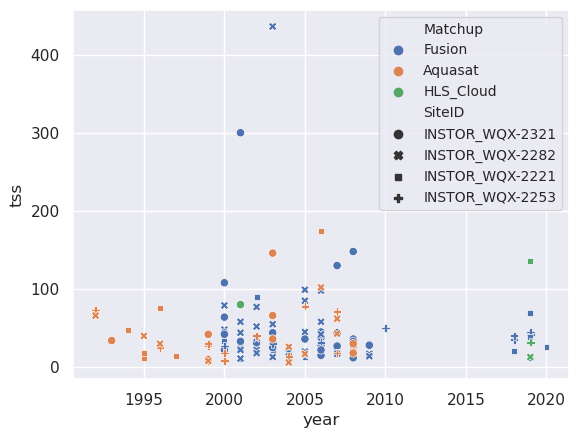

In [129]:
plot = sns.scatterplot(data=aquaFusion, x="year", y="tss", 
                       legend = 'brief', hue="Matchup", style = 'SiteID')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.legend(fontsize='10')
plot#.set(xlim = (0, 2500), ylim = (0,2500))

       Unnamed: 0               parameter units           SiteID        lat  \
33717     82055.0  Total suspended solids  mg/l  INSTOR_WQX-2321  40.411819   
34059     92378.0  Total suspended solids  mg/l  INSTOR_WQX-2321  40.411819   
34293     82098.0  Total suspended solids  mg/l  INSTOR_WQX-2282  40.736359   
34632     82196.0  Total suspended solids  mg/l  INSTOR_WQX-2282  40.736359   
34820     73468.0  Total suspended solids  mg/l  INSTOR_WQX-2321  40.411819   
...           ...                     ...   ...              ...        ...   
298         367.0  Total suspended solids  mg/l  INSTOR_WQX-2282  40.736359   
380           NaN  Total suspended solids  mg/l  INSTOR_WQX-2321        NaN   
408           NaN  Total suspended solids  mg/l  INSTOR_WQX-2221        NaN   
422           NaN  Total suspended solids  mg/l  INSTOR_WQX-2253        NaN   
423           NaN  Total suspended solids  mg/l  INSTOR_WQX-2282  40.736359   

            long  datum  value particle_size       

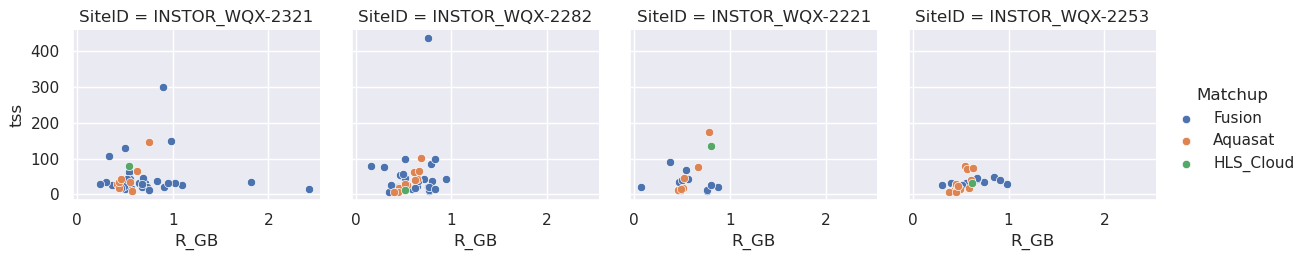

In [167]:
#CLEAN
aquaFusPlot = aquaFusion
#aquaFusPlot = aquaFusion[(aquaFusion.red < 2500) & (aquaFusion.green < 2500) & (aquaFusion.swir2 < 2500) & (aquaFusion.tss < 200) & (aquaFusion.R_GB < 1.0)]

g = sns.FacetGrid(aquaFusPlot, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="R_GB", y="tss")
g.add_legend()

# plot = sns.scatterplot(data=aquaFusPlot, x="green", y="blue", 
#                        legend = 'brief', 
#                        style = 'Matchup', hue="SiteID")
# plt.legend(fontsize='10')
# sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
# plot
print(aquaFusPlot)
aquaFusPlot.to_csv(r'aquaFusion_4Sites_modis9GA.csv')

['Fusion' 'Aquasat' 'HLS_Cloud' 'Fusion-No Match']


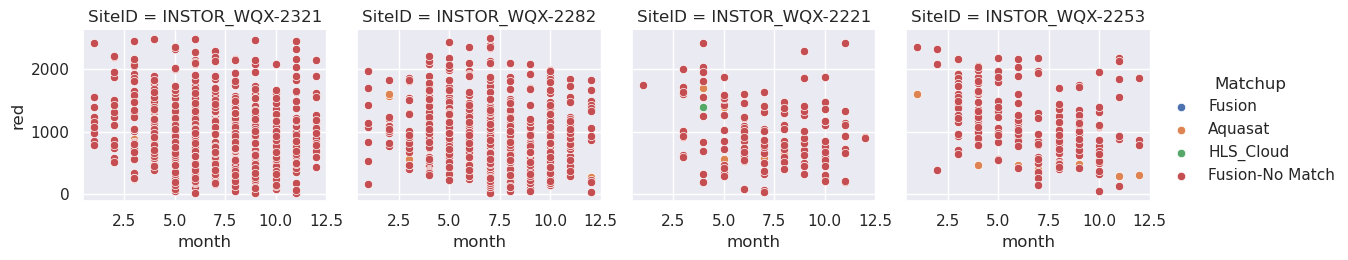

In [164]:
#Everything compared
matchupAll = pd.concat([aquaFusion, fusUnmatched]).dropna(subset='blue')

matchupAllPlot = matchupAll[(matchupAll.red < 2500) & (matchupAll.green < 2000) & (matchupAll.swir2 < 2500) ] #& (matchupAll.R_GB < 1.0)
print(matchupAll.Matchup.unique())
g = sns.FacetGrid(matchupAllPlot, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="month", y="red")
g.add_legend()


# Model

## RF

In [132]:
import numpy as np
import pandas as pd
from numpy import mean, arange
from numpy import std
import pprint
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn import ensemble, datasets, tree
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Define a Training and Testing Set



In [133]:
#define a training and testing set
features = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day']
labels = 'tss_log'
df= aquaFusPlot[['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log', 'tss_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day']].reset_index(drop=True)


# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df[labels])
df = df.drop(labels, axis =1)
feature_list = list(df.columns)
X = np.array(df)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

# summarize the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#define model
model = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

(74, 61)
(25, 61)
(74,)
(25,)


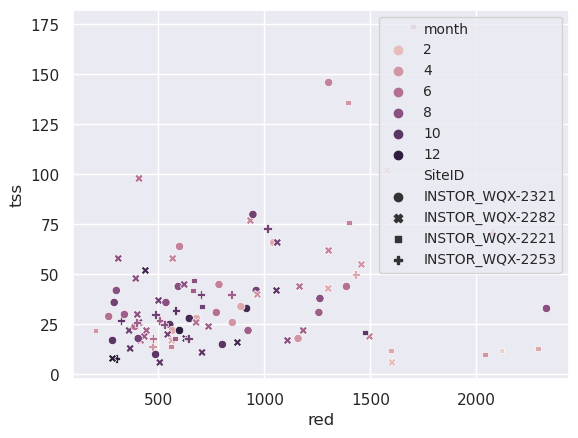

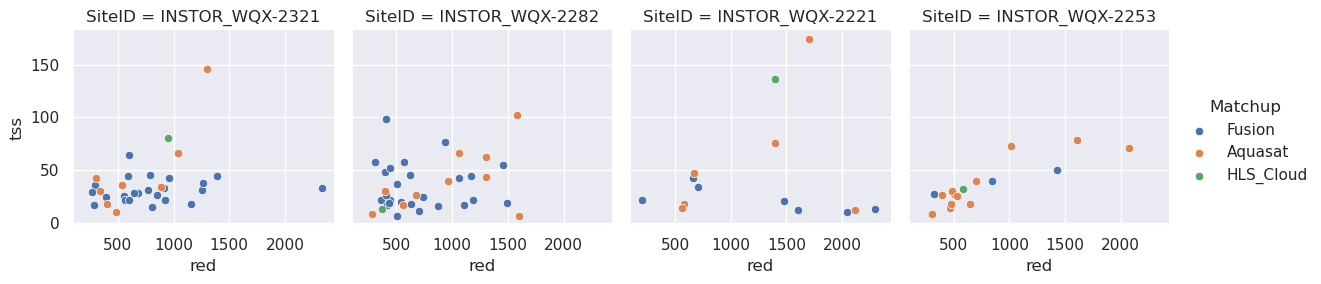

In [134]:
plot = sns.scatterplot(data=aquaFusPlot, x="red", y="tss", 
                       legend = 'brief', 
                       style = 'SiteID', hue="month")
plt.legend(fontsize='10')
plot

sns.set(font_scale=1)
g = sns.FacetGrid(aquaFusPlot, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="red", y="tss")
g.add_legend()


# Random Forest 1: No fit

Target: TSS

Input Data: 6 Bands

In [135]:
#Quick eval raw
model.fit(X_train, y_train)
print('Trained model oob score', model.oob_score_)

X_train_predict=pd.DataFrame(model.predict(X_train))
prediction = model.predict(X_test)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    model.predict(X_test)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predict=pd.DataFrame(
    model.predict(X_train)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = pd.concat([X_train_predict, X_test_predict])

Trained model oob score 0.031110759061361293


In [136]:
#Metrics for Model 1 

RMSE_model = np.sqrt(mean_squared_error(y_test, prediction))

#Metrics
print('Training score', model.score(X_train, y_train))
print('RMSE', RMSE_model)
print('Testing score', model.score(X_test, y_test))

from sklearn.metrics import r2_score

RSquared = r2_score(y_train, X_train_predict.reset_index().values)
print('RSquared', RSquared)

Training score 0.8666209148236443
RMSE 0.6574047470629646
Testing score 0.24993740016772348
RSquared 0.8666209148236443


There is a large difference between training and testing scores. The RMSE is also large given the average values of TSS but it is within the standard deviation of the data.

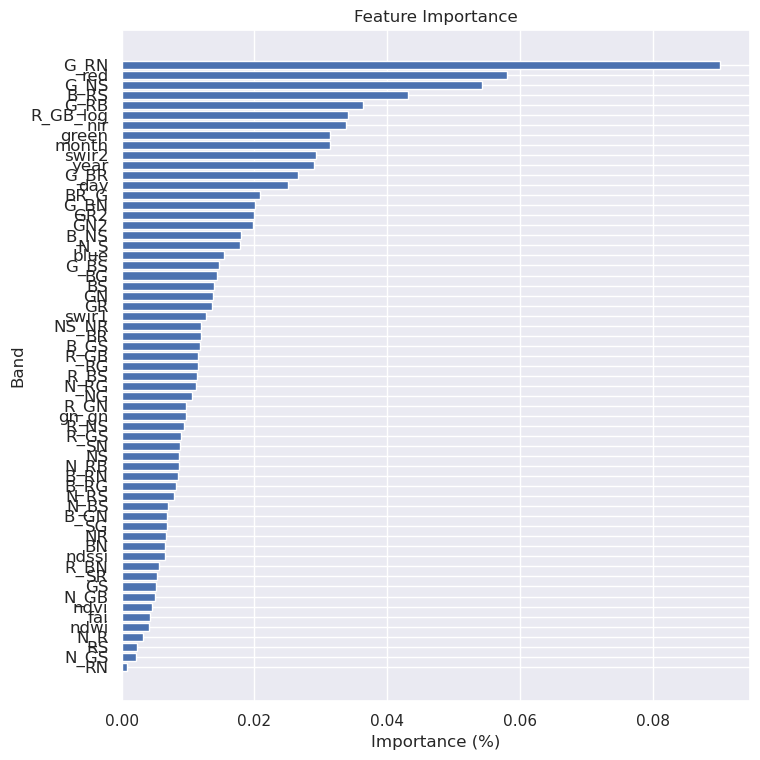

In [137]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 12)
plt.title('Feature Importance')
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


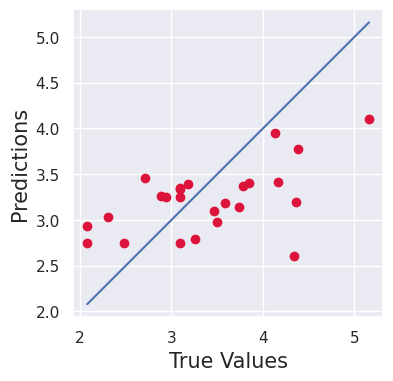

<AxesSubplot:>

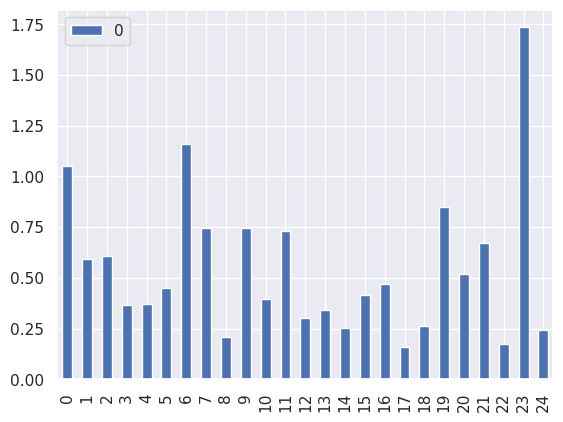

In [138]:
plt.figure(figsize=(4,4))
plt.scatter(y_test, prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs(prediction - y_test)
pd.DataFrame(errors).plot(kind='bar')

In [139]:
# Dates of training values
import datetime
months = X[:, feature_list.index('month')]
days = X[:, feature_list.index('day')]
years = X[:, feature_list.index('year')]# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# Dates of predictions
months = X_test[:, feature_list.index('month')]
days = X_test[:, feature_list.index('day')]
years = X_test[:, feature_list.index('year')]# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

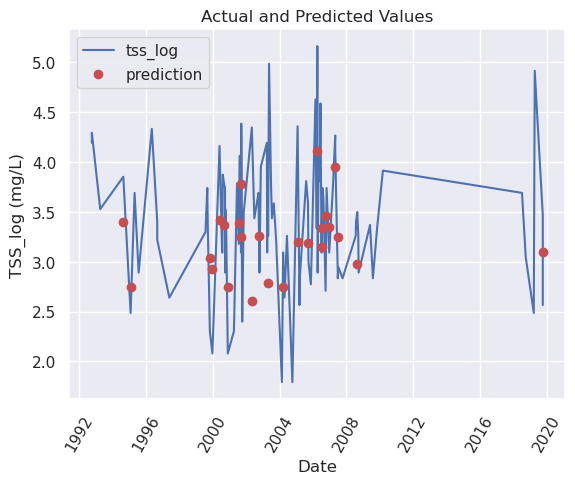

In [140]:
# Dataframe with predictions and dates
plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

In [141]:
###takes a lot of time. See results below.

from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42, verbose = 0)
param_grid = {
            "n_estimators" : [100, 150, 200, 300],
            "max_features" : ["1.0", "log2", "sqrt"],
            "max_depth"    : [1, 4, 7, 8, 10]
        }


grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= 5, verbose =0)
grid.fit(X_train, y_train)


forest = grid.best_estimator_

grid_prediction=forest.predict(X_test)

print ('Grid best score:', grid.best_score_, 'Grid best params:', grid.best_params_)

mae_grid = mean_absolute_error(y_test, grid_prediction)
RMSE_model_grid = np.sqrt(mean_squared_error(y_test, grid_prediction))

print('MAE:', mae_grid)
print('RMSE:', RMSE_model_grid)

Grid best score: -0.07133833858707721 Grid best params: {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 100}
MAE: 0.5449201214775268
RMSE: 0.637212590541152


/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/si

In [142]:
from sklearn.metrics import r2_score

RSquared = r2_score(y_train, X_train_predict.reset_index().values)
RSquared

0.8666209148236443

# Model with some fitted params

In [143]:
#define model
model1 = RandomForestRegressor(max_depth = 8, n_estimators = 150, min_samples_split = 2, max_features = 'sqrt', bootstrap = True, oob_score= True, warm_start = False, ccp_alpha = 0, min_impurity_decrease = 0)

In [144]:
#Quick eval raw
model1.fit(X_train, y_train)
print('Trained model oob score', 1 - model1.oob_score_)

prediction1 = model1.predict(X_test)
print('Test Score', model1.score(X_test, y_test))

Trained model oob score 0.8971669673372523
Test Score 0.3043953191566209


In [145]:
#Test Error: Model 1 RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#TEST

RMSE_model1 = np.sqrt(mean_squared_error(y_test, prediction1))

#Metrics
print('Training score', model1.score(X_train, y_train))
print('RMSE', RMSE_model1)
print('Testing score', model1.score(X_test, y_test))

Training score 0.8715081359577603
RMSE 0.6330898171191448
Testing score 0.3043953191566209


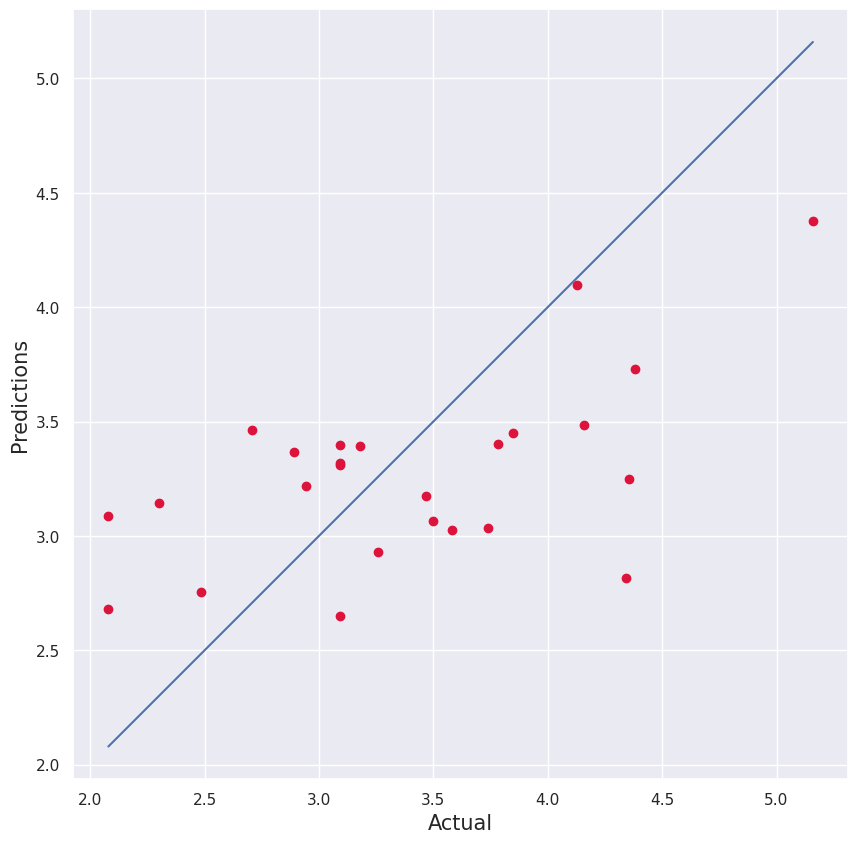

In [146]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction1, c='crimson')

p1 = max(max(prediction1), max(y_test))
p2 = min(min(prediction1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

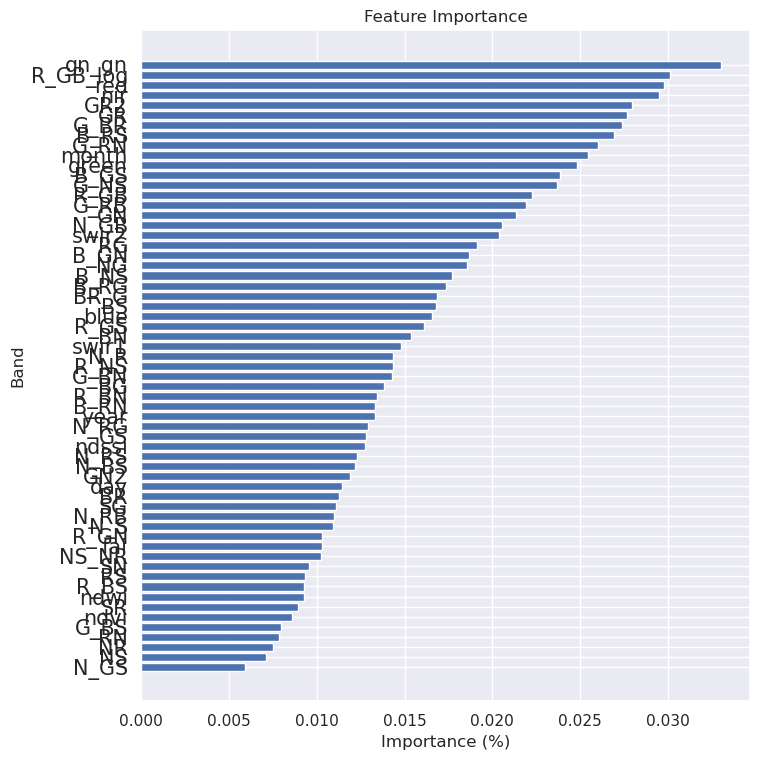

In [147]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 15)
plt.title('Feature Importance')
result = permutation_importance(model1, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


  Metric   RF1   RF2
0    MAE  0.18  0.18
1   RMSE  0.24  0.23


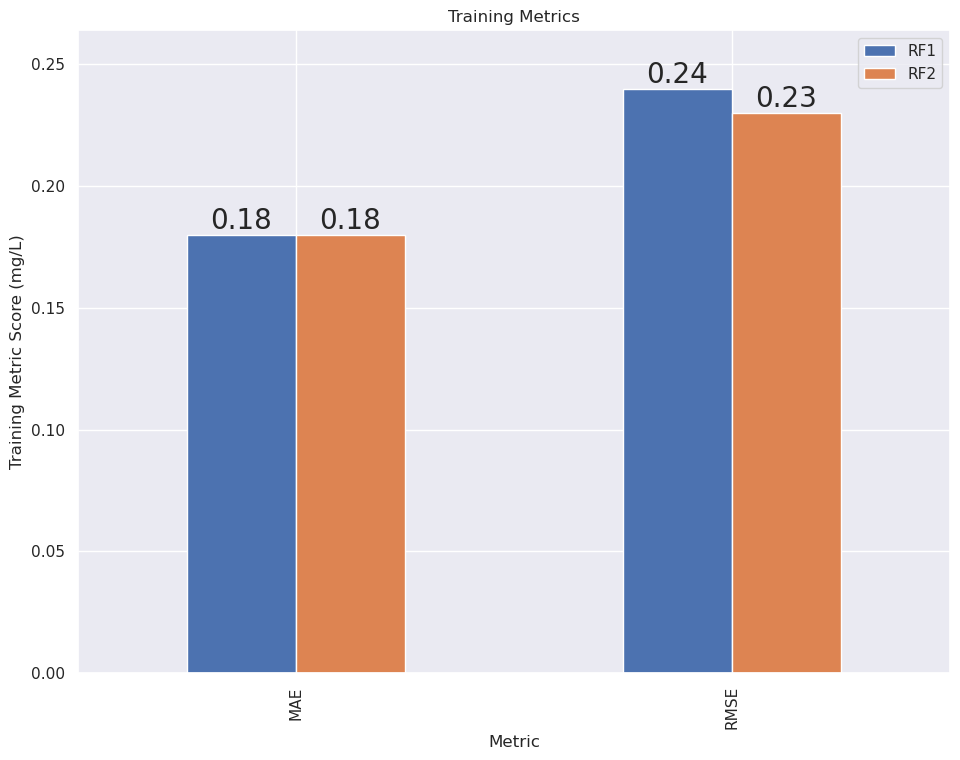

In [148]:
#Collect the test set predictions for d-h models

# model_pred = model.predict(X_test)
# model1_pred = model1.predict(X_test)


# Keep predictions of models d-h
model_train_pred = [model.predict(X_train),model1.predict(X_train)]

model_test_pred = [model.predict(X_test),model1.predict(X_test)]

# predicted MAE and MSE for training data

models_MAE = []
for i in model_train_pred:
    MAE = np.round(mean_absolute_error(y_train, i),2)
    models_MAE.append(MAE)

models_RMSE = []
for i in model_train_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_train, i)),2)
    models_RMSE.append(RMSE)

    
# Plot
mod_names=['RF1', 'RF2']
metric=pd.DataFrame(['MAE','RMSE'],columns=['Metric'])
df = pd.concat([metric,pd.DataFrame([models_MAE,models_RMSE],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Training Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Training Metric Score (mg/L)')
plt.tight_layout()
plt.show()

  Metric   RF1   RF2
0    MAE  0.55  0.54
1   RMSE  0.66  0.63


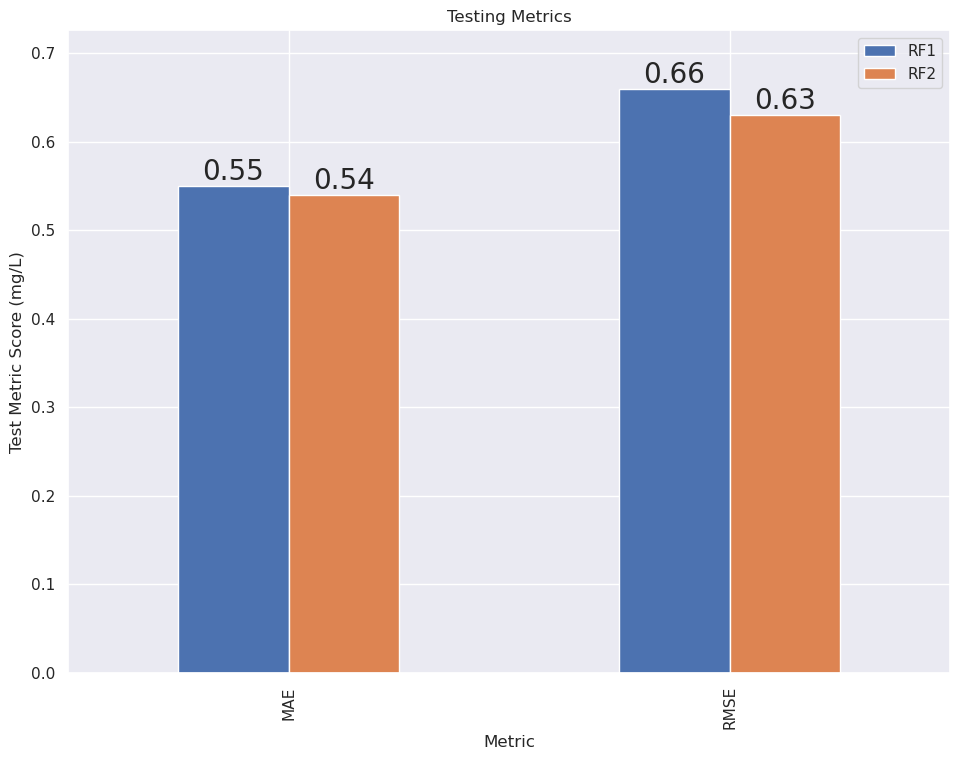

In [149]:
#Predict MAE and RMSE for test data

models_MAE_test = []
for i in model_test_pred:
    MAE = np.round(mean_absolute_error(y_test, i),2)
    models_MAE_test.append(MAE)

models_RMSE_test = []
for i in model_test_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_test, i)),2)
    models_RMSE_test.append(RMSE)

# Plot
df = pd.concat([metric,pd.DataFrame([models_MAE_test,models_RMSE_test],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Testing Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Test Metric Score (mg/L)')
plt.tight_layout()
plt.show()

# Aquasat on 4 Sites

In [150]:
#AquaFusion data
aquaHuc5 = aquaHuc5[['SiteID', 'date', 'blue', 'blue_sd', 'green', 'green_sd', 
                     'nir', 'nir_sd', 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2',
                     'swir2_sd', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 
                     'timediff', 'Matchup', 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG',
                     'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 
                     'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                     'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 
                     'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 
                     'gn_gn']]



aquaHuc5['month'] = pd.to_datetime(aquaHuc5['date']).dt.month
aquaHuc5['year'] = pd.to_datetime(aquaHuc5['date']).dt.year
aquaHuc5['day'] = pd.to_datetime(aquaHuc5['date']).dt.day
aquaHuc5['R_GB_log'] = np.log(aquaHuc5['R_GB'])
aquaHuc5['tss_log'] = np.log(aquaHuc5['tss'])

aquaHuc5_4Sites = aquaHuc5[aquaHuc5['SiteID'].isin(fusionSites)]

print(aquaHuc5_4Sites.columns.values.tolist())
print(len(aquaHuc5_4Sites.index))

['SiteID', 'date', 'blue', 'blue_sd', 'green', 'green_sd', 'nir', 'nir_sd', 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'timediff', 'Matchup', 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'month', 'day', 'R_GB_log', 'tss_log']
41


# Define a Training and Testing Set



In [151]:
#define a training and testing set

labels = 'tss_log'
df= aquaHuc5_4Sites[['blue', 'blue_sd', 'green', 'green_sd', 'nir', 'nir_sd', 
                 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 
                 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 
                 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 
                 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 
                 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 
                 'month', 'day', 'R_GB_log', 'tss_log']].reset_index(drop=True)


# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df[labels])
df = df.drop(labels, axis =1)
feature_list = list(df.columns)
X = np.array(df)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# summarize the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#define model
model = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

(32, 68)
(9, 68)
(32,)
(9,)


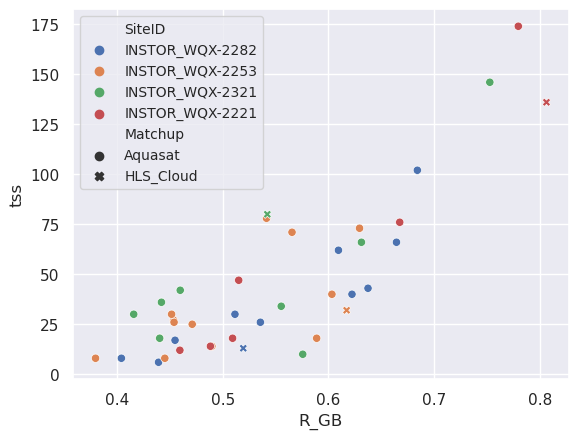

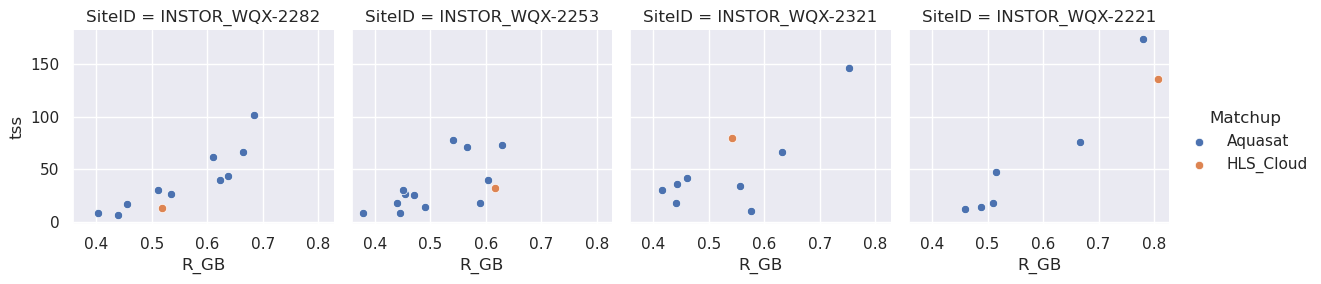

In [152]:
plot = sns.scatterplot(data=aquaHuc5_4Sites, x="R_GB", y="tss", 
                       legend = 'brief', 
                       style = 'Matchup', hue="SiteID")
plt.legend(fontsize='10')
plot

sns.set(font_scale=1)
g = sns.FacetGrid(aquaHuc5_4Sites, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="R_GB", y="tss")
g.add_legend()


# Random Forest Aquasat 4 Sites fit

Target: TSS

Input Data: 6 Bands

In [153]:
#Quick eval raw
model.fit(X_train, y_train)
print('Trained model oob score', model.oob_score_)

X_train_predict=pd.DataFrame(model.predict(X_train))
prediction = model.predict(X_test)



Trained model oob score 0.661454705516051


In [154]:
# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    model.predict(X_test)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predict=pd.DataFrame(
    model.predict(X_train)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = pd.concat([X_train_predict, X_test_predict])

In [155]:
#Metrics for Model 1 

RMSE_model = np.sqrt(mean_squared_error(y_test, prediction))

#Metrics
print('Training score', model.score(X_train, y_train))
print('RMSE', RMSE_model)
print('Testing score', model.score(X_test, y_test))

from sklearn.metrics import r2_score

RSquared = r2_score(y_train, X_train_predict.reset_index().values)
print('RSquared', RSquared)

Training score 0.9520360579856806
RMSE 0.30592082373349494
Testing score 0.8465326848034661
RSquared 0.9520360579856806


There is a large difference between training and testing scores. The RMSE is also large given the average values of TSS but it is within the standard deviation of the data.

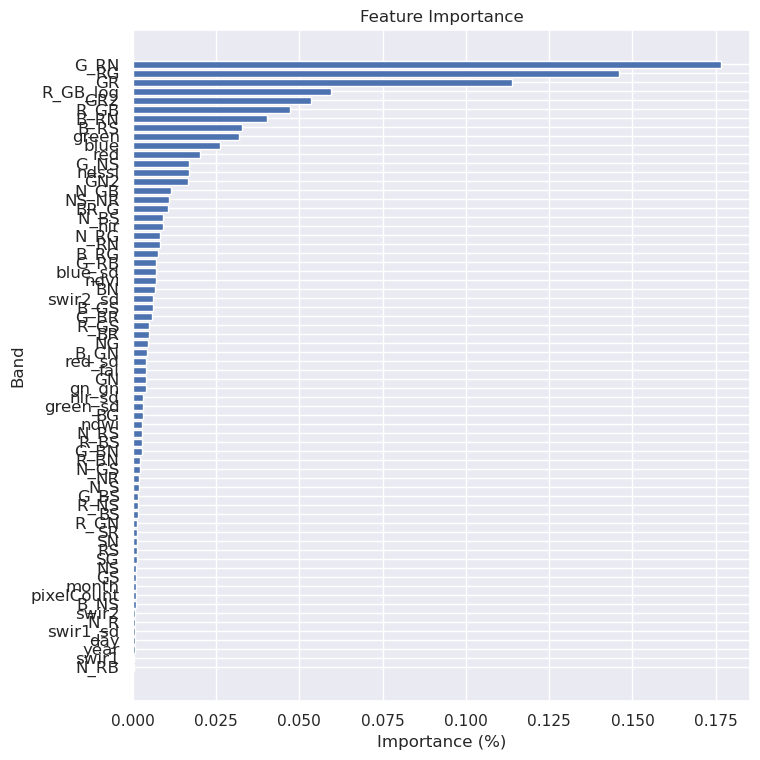

In [156]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 12)
plt.title('Feature Importance')
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()



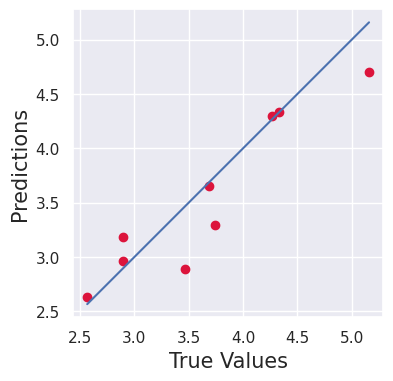

In [157]:
plt.figure(figsize=(4,4))
plt.scatter(y_test, prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

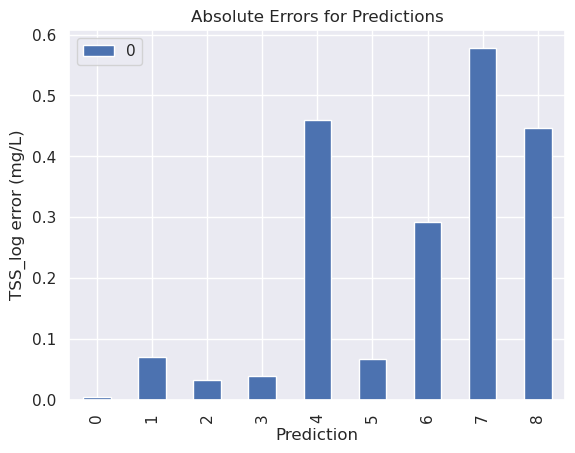

In [158]:
#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs(prediction - y_test)
pd.DataFrame(errors).plot(kind='bar')
plt.xlabel('Prediction'); plt.ylabel('TSS_log error (mg/L)'); plt.title('Absolute Errors for Predictions');

In [159]:
# Dates of training values
import datetime
months = X[:, feature_list.index('month')]
days = X[:, feature_list.index('day')]
years = X[:, feature_list.index('year')]# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# Dates of predictions
months = X_test[:, feature_list.index('month')]
days = X_test[:, feature_list.index('day')]
years = X_test[:, feature_list.index('year')]# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

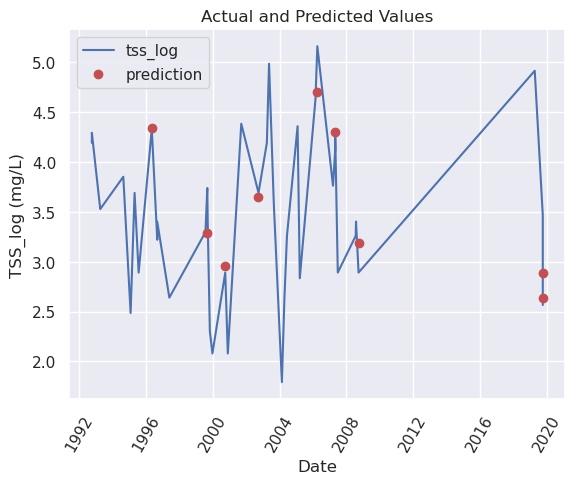

In [160]:
# Dataframe with predictions and dates
plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

## Regressions

                            OLS Regression Results                            
Dep. Variable:                    tss   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.107
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.299
Time:                        20:15:22   Log-Likelihood:                -224.37
No. Observations:                  42   AIC:                             452.7
Df Residuals:                      40   BIC:                             456.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6262      8.746      5.102      0.0

Text(0, 0.5, 'TSS')

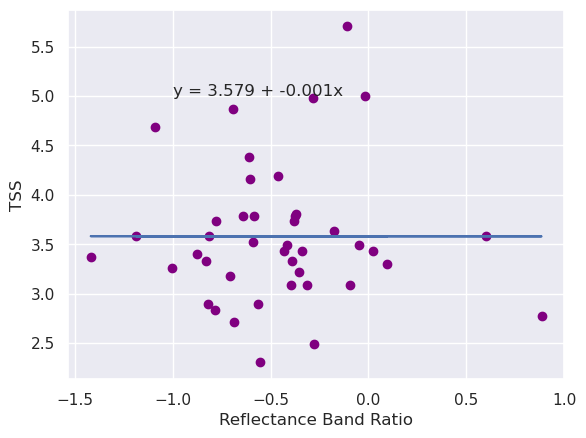

In [161]:
import statsmodels.api as sm
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2321']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'

#define predictor and response variables
y = df['tss']
x = df['red']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(-1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')

                            OLS Regression Results                            
Dep. Variable:                tss_log   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     6.258
Date:                Tue, 22 Nov 2022   Prob (F-statistic):             0.0203
Time:                        20:15:22   Log-Likelihood:                -17.690
No. Observations:                  24   AIC:                             39.38
Df Residuals:                      22   BIC:                             41.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9780      0.257     15.451      0.0

Text(0, 0.5, 'TSS')

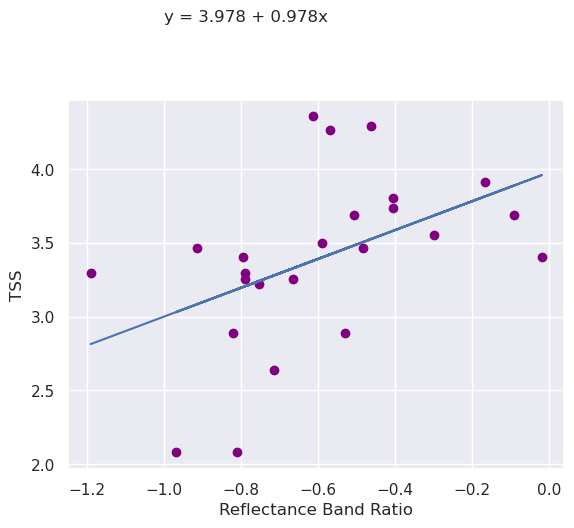

In [162]:
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2253']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#define predictor and response variables
y = df['tss_log']
x = df['R_GB_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(-1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')

                            OLS Regression Results                            
Dep. Variable:                    tss   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.7965
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.385
Time:                        20:15:22   Log-Likelihood:                -93.543
No. Observations:                  18   AIC:                             191.1
Df Residuals:                      16   BIC:                             192.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.3270     17.178      3.454      0.0

/work/efriedmann_umass_edu/.conda/envs/fusion_SNiP/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'TSS')

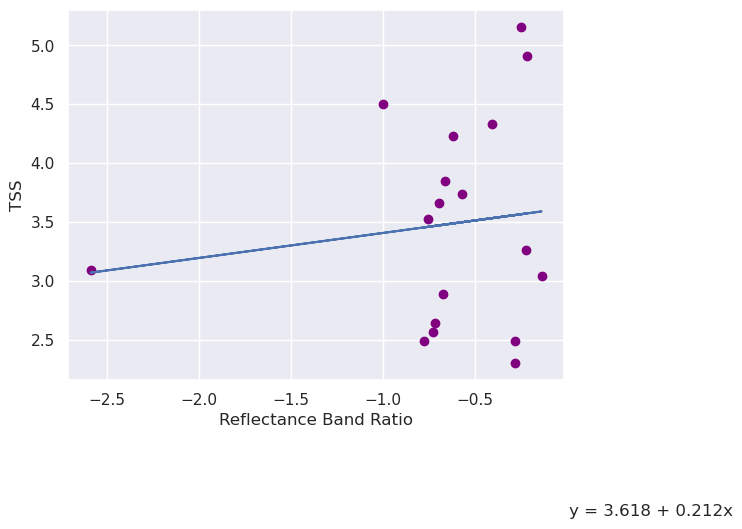

In [163]:
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2221']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#define predictor and response variables
y = df['tss']
x = df['R_GB_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(0.01, 1, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')